# Import Modules

In [1]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import Model, Sequential
from tensorflow.keras.datasets import mnist

import matplotlib.pyplot as plt
import numpy as np

C:\Users\n.zivkovic\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\n.zivkovic\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\n.zivkovic\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\n.zivkovic\AppData\Roaming\P

# Load and Prepare Data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### Check the shape of the data

In [3]:
X_train.shape

(60000, 28, 28)

### Normalize and extend dimension

In [4]:
X_train = X_train / 255.0
X_train = np.expand_dims(X_train, axis=3)

X_test = X_test / 255.0
X_test = np.expand_dims(X_test, axis=3)

# Display Data

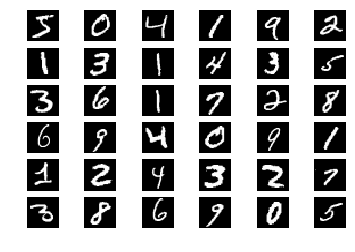

In [5]:
fig, axs = plt.subplots(6, 6)
count = 0
for i in range(6):
    for j in range(6):
        axs[i,j].imshow(X_train[count, :,:,0], cmap='gray')
        axs[i,j].axis('off')
        count += 1


# Build and Compile Model

In [6]:
model = Sequential()
model.add(Conv2D(32, 3, activation='relu', input_shape=(28,28, 1)))
model.add(Conv2D(64, 3, activation='relu'))
model.add(Conv2D(128, 3, activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train Model

In [7]:
model.fit(X_train, y_train, batch_size=128, epochs=10) 

W0904 15:05:45.372867 16788 deprecation.py:323] From C:\Users\n.zivkovic\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 184s 3ms/sample - loss: 0.1282 - accuracy: 0.9608
Epoch 2/10
60000/60000 [==============================] - 197s 3ms/sample - loss: 0.0357 - accuracy: 0.9888
Epoch 3/10
60000/60000 [==============================] - 193s 3ms/sample - loss: 0.0222 - accuracy: 0.9927
Epoch 4/10
60000/60000 [==============================] - 177s 3ms/sample - loss: 0.0150 - accuracy: 0.9952
Epoch 5/10
60000/60000 [==============================] - 172s 3ms/sample - loss: 0.0115 - accuracy: 0.9962
Epoch 6/10
60000/60000 [==============================] - 158s 3ms/sample - loss: 0.0105 - accuracy: 0.9965
Epoch 7/10
60000/60000 [==============================] - 175s 3ms/sample - loss: 0.0064 - accuracy: 0.9980
Epoch 8/10
60000/60000 [==============================] - 181s 3ms/sample - loss: 0.0064 - accuracy: 0.9979
Epoch 9/10
60000/60000 [==============================] - 161s 3ms/sample - loss: 0.0070 - accuracy: 0.9978
Epoch

# Evaluate Model

In [8]:
score = model.evaluate(X_test, y_test)
print("Accuracy is: {}".format(score[1]))

10000/10000 [==============================] - 7s 694us/sample - loss: 0.0407 - accuracy: 0.9904 - loss: 0.0 - ETA: 0s - loss: 0.0398 - accuracy
Accuracy is: 0.9904000163078308


# Predictions

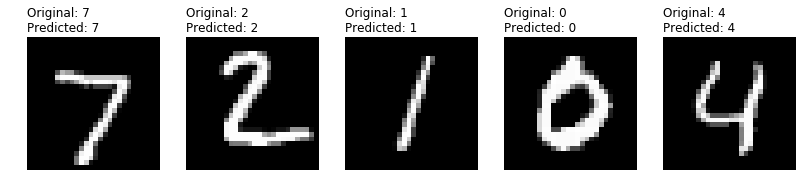

In [9]:
predictions = model.predict(X_test)

plt.figure(figsize=(28, 28)) 
for i in range(5):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')
    original = y_test[i]
    predicted = np.argmax(predictions[i])
    plt.title("Original: {}\nPredicted: {}".format(original, predicted), loc='left')    
    plt.axis('off') 
plt.show()

In [10]:
jsonmodel = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(jsonmodel)

In [11]:
model.save('model.h5')